In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
model_folder = "../training/saved/2024-03-28/2_1_8_octaves"
archive = np.load(model_folder + "/predictions.npz")
y_pred = archive["y_pred"]
y_gt = archive["y_gt"]

In [3]:
def tab_to_pitch(tab):
    result = []
    open_pitch_values = [40, 45, 50, 55, 59, 64]
    for index, string_vector in enumerate(tab):
        fret_index = np.argmax(string_vector)
        #fret_index = 0 means that the string is muted
        if fret_index > 0:
            midi_value = fret_index + open_pitch_values[index] - 1
            if midi_value not in result:
                result.append(midi_value)
    return result

In [20]:
# aligns equal pitches
def process_pitches(pred_pitch_list, gt_pitch_list):
    i = 0
    j = 0
    while i < len(pred_pitch_list) and j < len(gt_pitch_list):
        if pred_pitch_list[i] > gt_pitch_list[j]:
            pred_pitch_list = pred_pitch_list[:i] + [0] + pred_pitch_list[i:]
        elif pred_pitch_list[i] < gt_pitch_list[j]:
            gt_pitch_list = gt_pitch_list[:j] + [0] + gt_pitch_list[j:]

        i += 1
        j += 1
    ppllen = len(pred_pitch_list)
    gpllen = len(gt_pitch_list)
    pred_pitch_list += [0] * (gpllen-j)
    gt_pitch_list += [0] * (ppllen-i)
    return pred_pitch_list, gt_pitch_list

In [21]:
ppl = [40, 44, 51, 60]
gpl = [25, 40, 42, 44, 60, 61]
print(process_pitches(ppl, gpl))

ppl = [10, 20, 30, 40]
gpl = [30]
print(process_pitches(ppl, gpl))

ppl = [1,2,3]
gpl = [1,2,3,4,5]
print(process_pitches(ppl, gpl))

([0, 40, 0, 44, 51, 60, 0], [25, 40, 42, 44, 0, 60, 61])
([10, 20, 30, 40], [0, 0, 30, 0])
([1, 2, 3, 0, 0], [1, 2, 3, 4, 5])


In [22]:
pred = []
gt = []

for i in range(len(y_gt)):
    pred_pitches = tab_to_pitch(y_pred[i])
    gt_pitches = tab_to_pitch(y_gt[i])
    pred_pitches.sort()
    gt_pitches.sort()

    pred_pitches, gt_pitches = process_pitches(pred_pitches, gt_pitches)
    if (len(pred_pitches) != len(gt_pitches)):
        raise "Hello?"

    pred += pred_pitches
    gt += gt_pitches

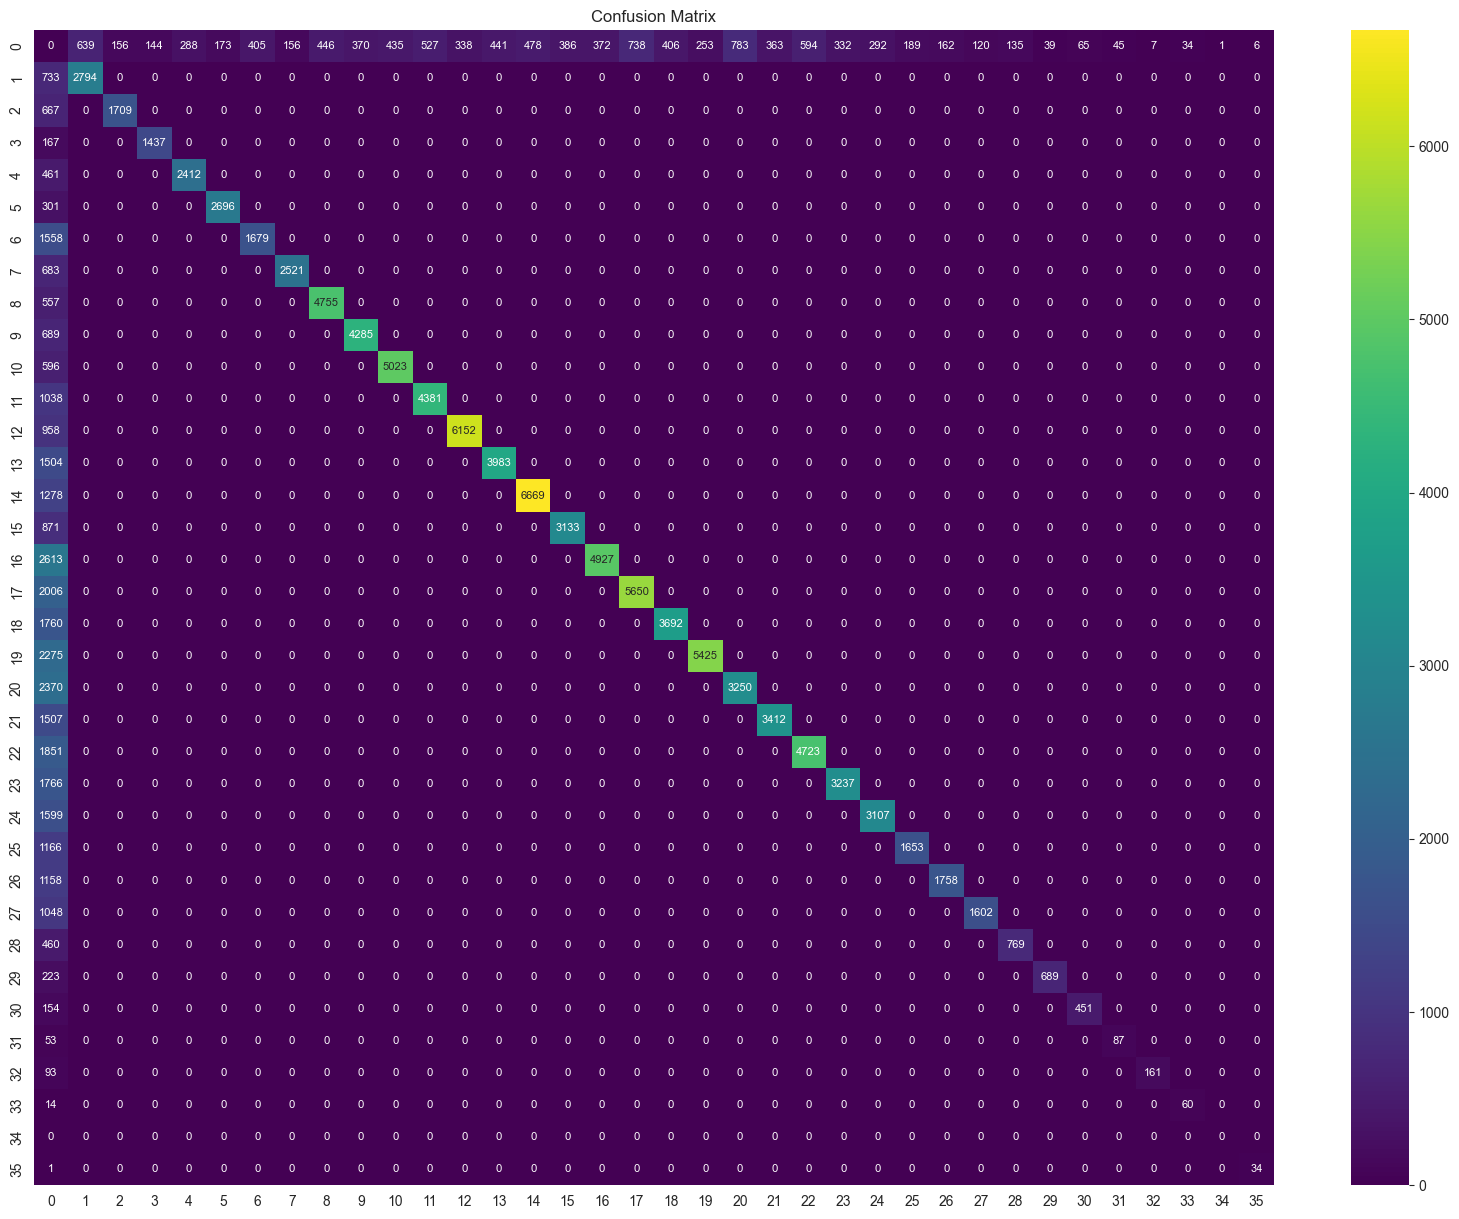

In [23]:

pred = np.array(pred)
gt = np.array(gt)
labels = ['0'] + [str(i) for i in range(40, 82)]

conf_matrix = confusion_matrix(gt, pred)
table = pd.DataFrame(conf_matrix)

plt.figure(figsize=(20, 15))
ax = sns.heatmap(table, annot=True, fmt='d', cmap='viridis', annot_kws={"size": 8})
# ax.set_xticklabels(labels)
# ax.set_yticklabels(labels, rotation=0)
plt.title('Confusion Matrix')
plt.show()
